In [28]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os
import pathlib
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [29]:
from src import utils

nodes, edges = utils.load_data()
nodes.drop(columns=['Label'], inplace=True)
nodes


,Id
0,visitorfi5kl7q7i
1,uisspxbl7ipc5bet
2,directoryvi6plzm
3,telnetg42y5crrb7
4,gl75awtvsmp2ofe6
...,...
7173,4co7hns6t7qt22ix
7174,mwprbruk4sc5t4li
7175,vysoofjtouvo2bl3
7176,lxvfo33z43yd6piu


In [30]:
edges.drop(columns=['Type'], inplace=True)
edges

,Source,Target,Weight
0,visitorfi5kl7q7i,uisspxbl7ipc5bet,1
1,visitorfi5kl7q7i,xidp5a5k3rlxr5r3,1
2,visitorfi5kl7q7i,7uvijlsswycvih2p,1
3,visitorfi5kl7q7i,4oy7nsv57l3ragqz,1
4,visitorfi5kl7q7i,prometh5th5t5rfd,1
...,...,...,...
25099,jzsm6raa2iw3hkue,tt3j2x4k5ycaa5zt,1
25100,3prjgaibgjpkkknu,tt3j2x4k5ycaa5zt,3
25101,grams5ieqi6zi3n7,toradsc6vvmtugty,1
25102,ijb7rxextmnhkd76,torvps7kzis5ujfz,3


In [31]:
G = nx.from_pandas_edgelist(edges, 'Source', 'Target', create_using=nx.DiGraph())
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 7178
Number of edges: 25104


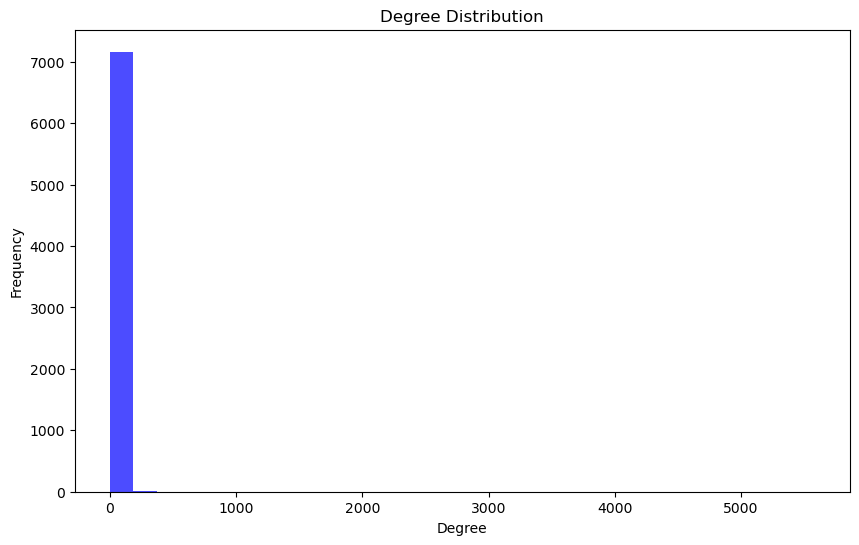

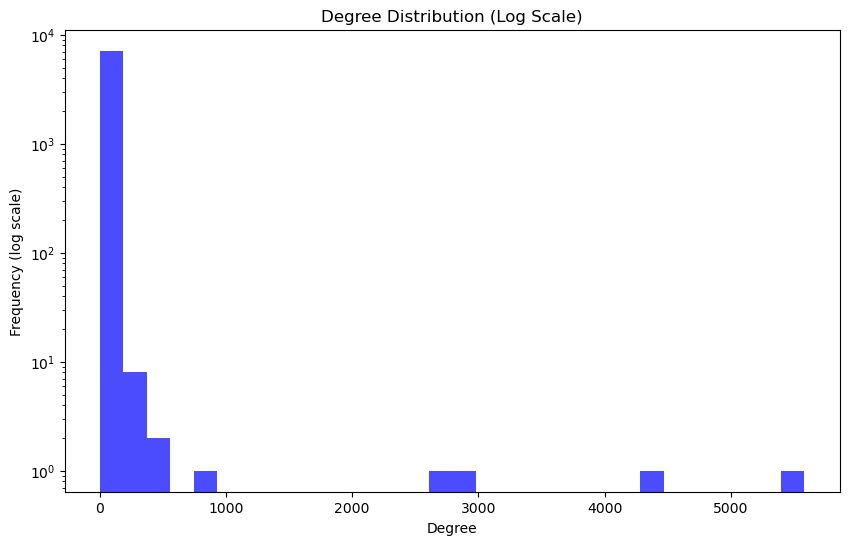

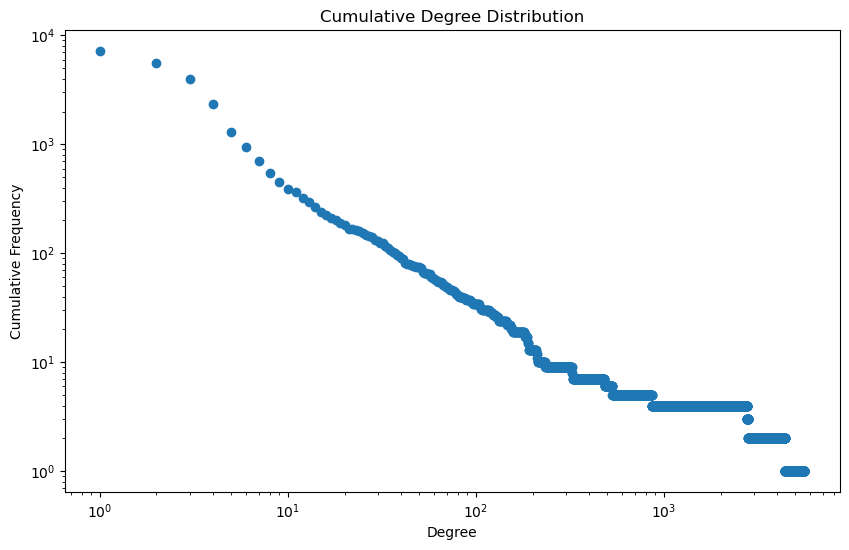

In [32]:
#degree distribution
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(10,6))
plt.hist(degrees, bins=30, color='blue', alpha=0.7)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

#now on log scale
plt.figure(figsize=(10,6))
plt.hist(degrees, bins=30, color='blue', alpha=0.7, log=True)
plt.title('Degree Distribution (Log Scale)')
plt.xlabel('Degree')
plt.ylabel('Frequency (log scale)')
plt.show()

#cumulative degree distribution
degree_counts = np.bincount(degrees)
cumulative_counts = np.cumsum(degree_counts[::-1])[::-1]
plt.figure(figsize=(10,6))
plt.loglog(range(len(cumulative_counts)), cumulative_counts, marker='o', linestyle='none')
plt.title('Cumulative Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Cumulative Frequency')
plt.show()